In [1]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import translated dataframe
data = pd.read_pickle("/home/yosr/Downloads/TraintopicsTranslated.pkl")
data

data_text = pd.concat([data['translated_text'],data['categories']],axis=1)
data_text.head()

,translated_text,categories
0,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...,Arts & Entertainment
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,Arts & Entertainment
2,Concrete Floor Leveling Tool a Paper Roller: W...,Business & Industrial
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,"Autos & Vehicles,Home & Garden,Business & Indu..."
4,Pes 15 Barclays patch and kitspatch Barclays P...,"Games,Sports"


In [3]:
#seperating labels of each observation in a singular column
dfL = data_text['categories'].apply(lambda x: pd.Series(x.split(',')))
dfL.head()

,0,1,2,3,4,5,6,7
0,Arts & Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arts & Entertainment,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Business & Industrial,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Autos & Vehicles,Home & Garden,Business & Industrial,NaN,NaN,NaN,NaN,NaN
4,Games,Sports,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#replacing Nan with 0 for future use
dfL = dfL.replace(np.nan, 0)
dfL

,0,1,2,3,4,5,6,7
0,Arts & Entertainment,0,0,0,0,0,0,0
1,Arts & Entertainment,0,0,0,0,0,0,0
2,Business & Industrial,0,0,0,0,0,0,0
3,Autos & Vehicles,Home & Garden,Business & Industrial,0,0,0,0,0
4,Games,Sports,0,0,0,0,0,0
5,Games,Sports,0,0,0,0,0,0
6,Internet & Telecom,Computers & Electronics,0,0,0,0,0,0
7,Games,0,0,0,0,0,0,0
8,Games,Arts & Entertainment,0,0,0,0,0,0
9,Food & Drink,0,0,0,0,0,0,0


In [5]:
#extracting all the labels and putting them in a list
okList=[]
for cl in dfL.columns:
     for n in dfL[cl]:
            okList.append(n)
okList=list(set(okList))
#okList.pop(0)
okList

[0,
 'Food & Drink',
 'Health',
 'Science',
 'Games',
 'Computers & Electronics',
 '(Unknown)',
 'Jobs & Education',
 'Reference',
 'Internet & Telecom',
 'Books & Literature',
 'Business & Industrial',
 'Hobbies & Leisure',
 'Law & Government',
 'Autos & Vehicles',
 'Finance',
 'Real Estate',
 'Shopping',
 'Travel',
 'News',
 'Sports',
 'Pets & Animals',
 'Home & Garden',
 'Arts & Entertainment',
 'People & Society',
 'Beauty & Fitness']

In [6]:
okList.pop(0)

0

In [7]:
from pandas import DataFrame
newDF=DataFrame(columns=okList)
#new dataframe for all 25 categories each seperated in one column
for x in range(dfL.count()[0]):
    someDict={}
    for d in okList:
        rowdata=list(dfL.iloc[x])
        if d in rowdata:
            someDict[d]=1
        else:
            someDict[d]=0
    newDF=newDF.append(someDict,ignore_index=True)
newDF

,Food & Drink,Health,Science,Games,Computers & Electronics,(Unknown),Jobs & Education,Reference,Internet & Telecom,Books & Literature,...,Real Estate,Shopping,Travel,News,Sports,Pets & Animals,Home & Garden,Arts & Entertainment,People & Society,Beauty & Fitness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#our final and unique dataset

df=pd.concat([data_text['translated_text'],newDF],axis=1)
df.head()

,translated_text,Food & Drink,Health,Science,Games,Computers & Electronics,(Unknown),Jobs & Education,Reference,Internet & Telecom,...,Real Estate,Shopping,Travel,News,Sports,Pets & Animals,Home & Garden,Arts & Entertainment,People & Society,Beauty & Fitness
0,GIVE ME A NIGHT by LOS INQUIETOS (BEsAs) - JON...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,YouTube Doki - Doki Gets BulliedDoki tries to ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Concrete Floor Leveling Tool a Paper Roller: W...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Mi-T-M 3500psi 4 gpm Pressure Washer Demonstra...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,Pes 15 Barclays patch and kitspatch Barclays P...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [9]:
#Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = df.iloc[:,1:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of videos = ",len(df))
print("Number of clean videos = ",clean_comments_count)
print("Number of videos with labels =",(len(df)-clean_comments_count))

Total number of videos =  17788
Number of clean videos =  0
Number of videos with labels = 17788


In [10]:
#categories
categories = list(df.columns.values)
categories = categories[1:]
print(categories)

['Food & Drink', 'Health', 'Science', 'Games', 'Computers & Electronics', '(Unknown)', 'Jobs & Education', 'Reference', 'Internet & Telecom', 'Books & Literature', 'Business & Industrial', 'Hobbies & Leisure', 'Law & Government', 'Autos & Vehicles', 'Finance', 'Real Estate', 'Shopping', 'Travel', 'News', 'Sports', 'Pets & Animals', 'Home & Garden', 'Arts & Entertainment', 'People & Society', 'Beauty & Fitness']


In [11]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of videos'])
df_stats

,category,number of videos
0,Food & Drink,1126
1,Health,46
2,Science,1341
3,Games,4240
4,Computers & Electronics,1869
5,(Unknown),234
6,Jobs & Education,105
7,Reference,304
8,Internet & Telecom,587
9,Books & Literature,180


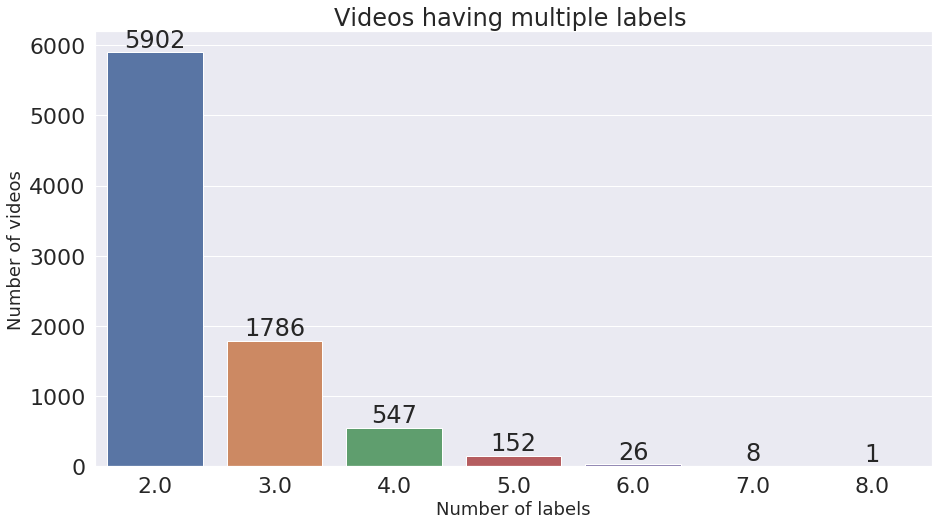

In [12]:
#calculating number of videos having multipl topics

rowSums = df.iloc[:,1:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(15,8))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)

plt.title("Videos having multiple labels ")
plt.ylabel('Number of videos', fontsize=18)
plt.xlabel('Number of labels', fontsize=18)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

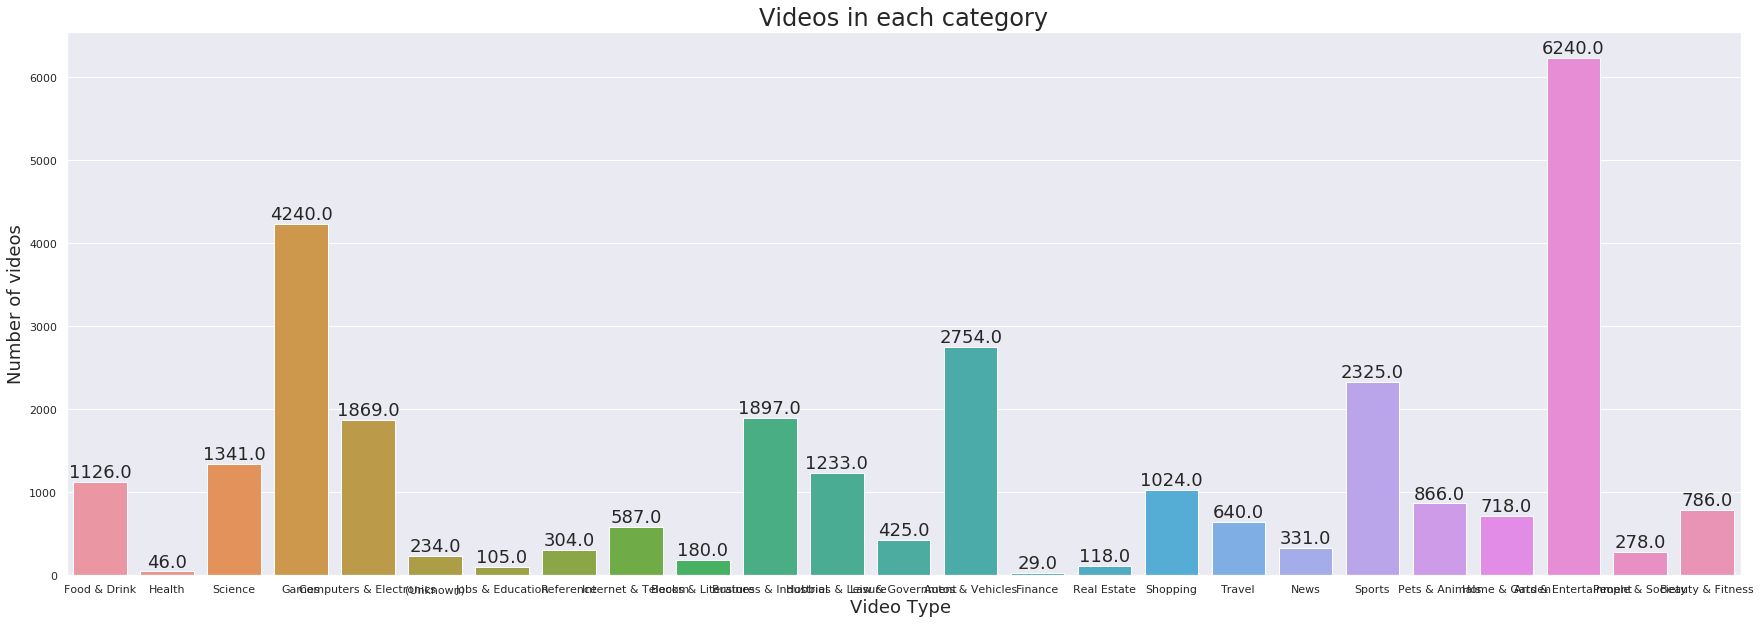

In [16]:

sns.set(font_scale = 1)
plt.figure(figsize=(30,10))

ax= sns.barplot(categories, df.iloc[:,1:].sum().values)

plt.title("Videos in each category", fontsize=24)
plt.ylabel('Number of videos', fontsize=18)
plt.xlabel('Video Type ', fontsize=18)

#adding the text labels
rects = ax.patches
labels = df.iloc[:,1:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.show()

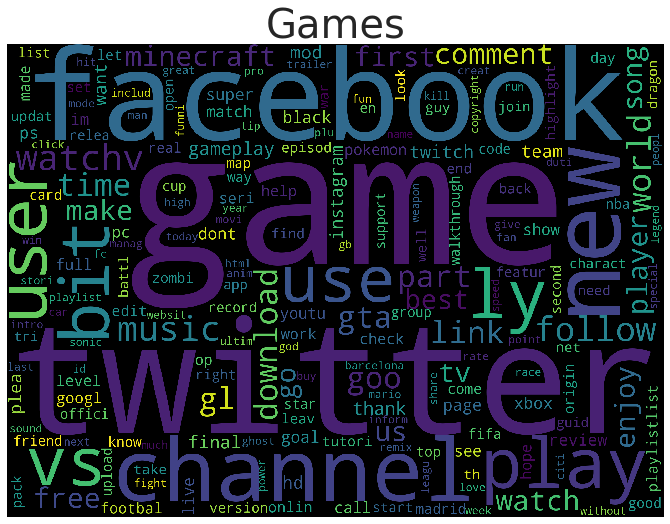

In [28]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Games
subset = df[df.Games==1]
text = subset.translated_text.values
cloud_Arts = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Games",fontsize=40)
plt.imshow(cloud_Arts)

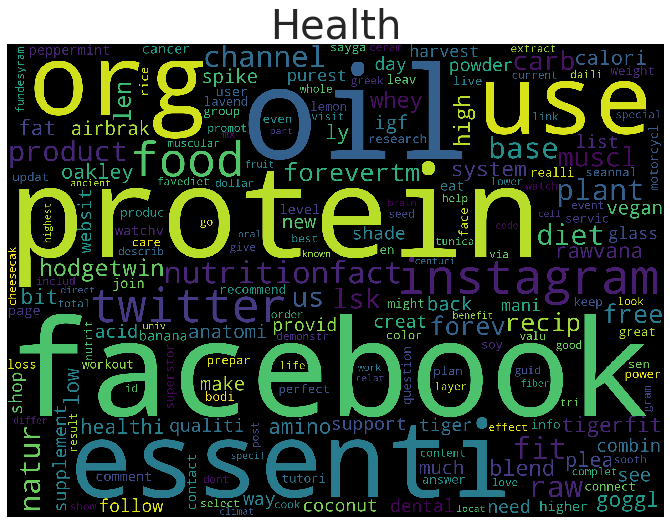

In [29]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Health
subset = df[df.Health==1]
text = subset.translated_text.values
cloud_Arts = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Health",fontsize=40)
plt.imshow(cloud_Arts)

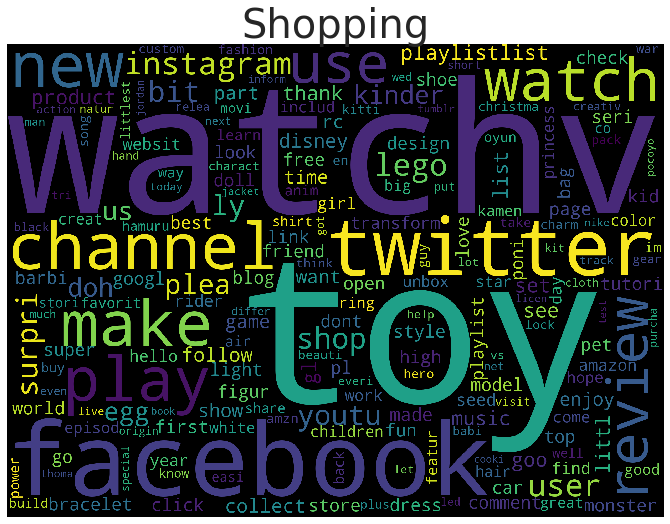

In [30]:

from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# Health
subset = df[df.Shopping==1]
text = subset.translated_text.values
cloud_Arts = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 3, 1)
plt.axis('off')
plt.title("Shopping",fontsize=40)
plt.imshow(cloud_Arts)

In [18]:
#we will clean the data first with our preprocessing techniques to get a better view at words of every category

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

#function to remove digits just to make sure
def removeCharDigit(text):
    str='`1234567890-=~@#$%^&*()►■●•_+[!{;":\'><.,/?"}]'
    for w in text:
        if w in str:
            text=text.replace(w,'')
    return text

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

#function to remove accented chars
import unicodedata
def removeAscendingChar(data):
    data=unicodedata.normalize('NFKD', data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return data

# Function for url's
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [19]:

import re

#put all the unctions above into one global function
def PreProcessing(text):
    text=removeAscendingChar(text)
    #print(text)
    text=cleanPunc(text)
    #print(text)
    text=keepAlpha(text)
    #print(text)
    text=removeCharDigit(text)
    text = remove_urls(text)
    return(text)


df['translated_text'] =df['translated_text'].str.lower()
#apply the function preprocess to our data
df['translated_text'] = df['translated_text'].map(lambda com : PreProcessing(com))

df.head()

,translated_text,Food & Drink,Health,Science,Games,Computers & Electronics,(Unknown),Jobs & Education,Reference,Internet & Telecom,...,Real Estate,Shopping,Travel,News,Sports,Pets & Animals,Home & Garden,Arts & Entertainment,People & Society,Beauty & Fitness
0,give me a night by los inquietos besas jonna...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,youtube doki doki gets bullieddoki tries to ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,concrete floor leveling tool a paper roller w...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,mi t m psi gpm pressure washer demonstratio...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,pes barclays patch and kitspatch barclays pr...,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [26]:
#removing stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however',
                   'yet','within','www','e','de','la','el','v','www','http','com','https','a','b','c',
                  'd','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','z','x','youtub',
                  'video','subscrib'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)

def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

df['translated_text'] = df['translated_text'].apply(removeStopWords)
#df.head()

In [27]:
#stemming
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

df['translated_text'] = df['translated_text'].apply(stemming)
#df.head()